In [3]:
library(Sleuth3)

In [7]:
datos = Sleuth3::case1502
str(datos)
names(datos)
head(datos)
attach(datos)
# los datos son de la temperatura menos la media

'data.frame':	161 obs. of  2 variables:
 $ Year       : int  1850 1851 1852 1853 1854 1855 1856 1857 1858 1859 ...
 $ Temperature: num  -0.371 -0.222 -0.178 -0.224 -0.113 -0.238 -0.403 -0.399 -0.42 -0.273 ...


[1] "Year"        "Temperature"

Year,Temperature
1850,-0.371
1851,-0.222
1852,-0.178
1853,-0.224
1854,-0.113
1855,-0.238


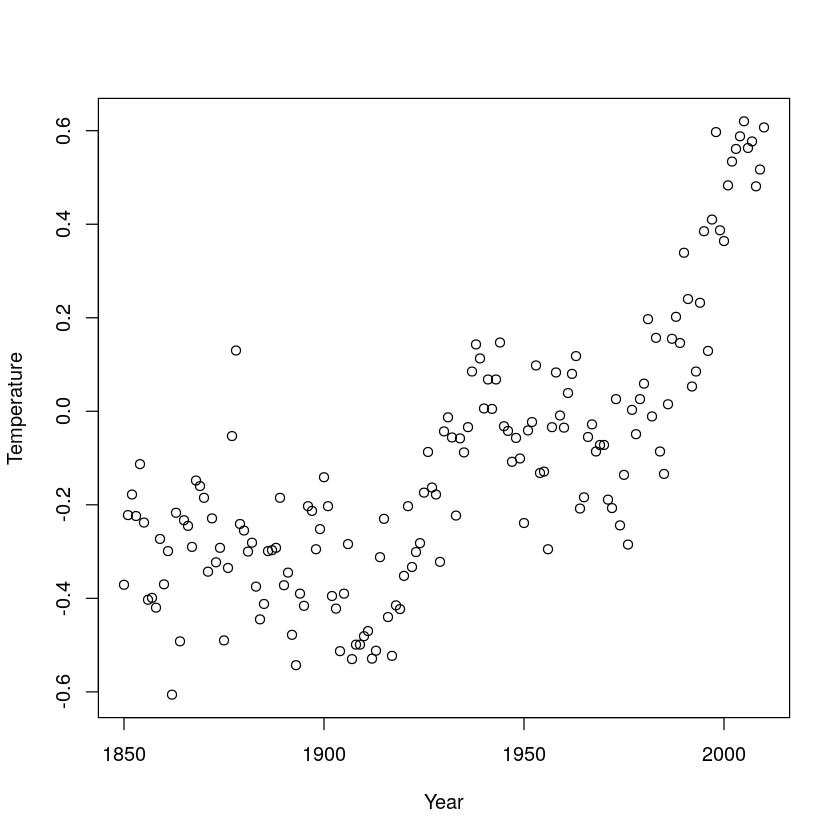

In [8]:
plot(Temperature~Year)

In [19]:
# hacemos un modelo cuadratico
year = (Year-1900)/100 # lo escalo porque sino la estimacion std me da cualquiera
modelo.Q = lm(Temperature~year+I(year^2))
modelo.L = lm(Temperature~year)
summary(modelo.Q)
summary(modelo.L)
anova(modelo.L, modelo.Q)
#abline(modelo,col="red")


Call:
lm(formula = Temperature ~ year + I(year^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37663 -0.10532  0.01289  0.10494  0.45210 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.32095    0.01607 -19.966  < 2e-16 ***
year         0.12594    0.04475   2.814  0.00551 ** 
I(year^2)    0.54860    0.06131   8.948 9.29e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1503 on 158 degrees of freedom
Multiple R-squared:  0.7163,	Adjusted R-squared:  0.7127 
F-statistic: 199.5 on 2 and 158 DF,  p-value: < 2.2e-16



Call:
lm(formula = Temperature ~ year)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37905 -0.12748  0.00454  0.11083  0.48195 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.25183    0.01725  -14.60   <2e-16 ***
year         0.45510    0.03118   14.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1839 on 159 degrees of freedom
Multiple R-squared:  0.5726,	Adjusted R-squared:  0.5699 
F-statistic:   213 on 1 and 159 DF,  p-value: < 2.2e-16


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
159,5.376751,NA,NA,NA,NA
158,3.568423,1,1.808328,80.06782,9.287478e-16


In [20]:
# me quedo con el modelo Q: Cuadratico

yy = -0.329095+0.12594*year+0.54860*year^2
lines(Year, yy, col='red')

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


In [18]:
library(car)
ncvTest(modelo.Q)
residuos.Q = modelo.Q

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.2749847, Df = 1, p = 0.60001

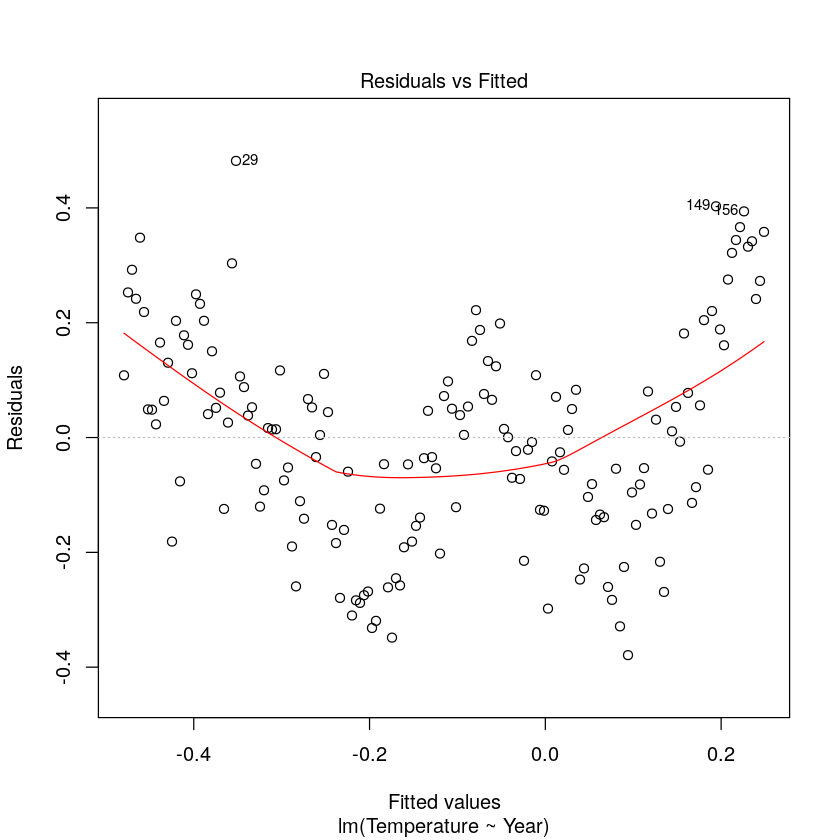

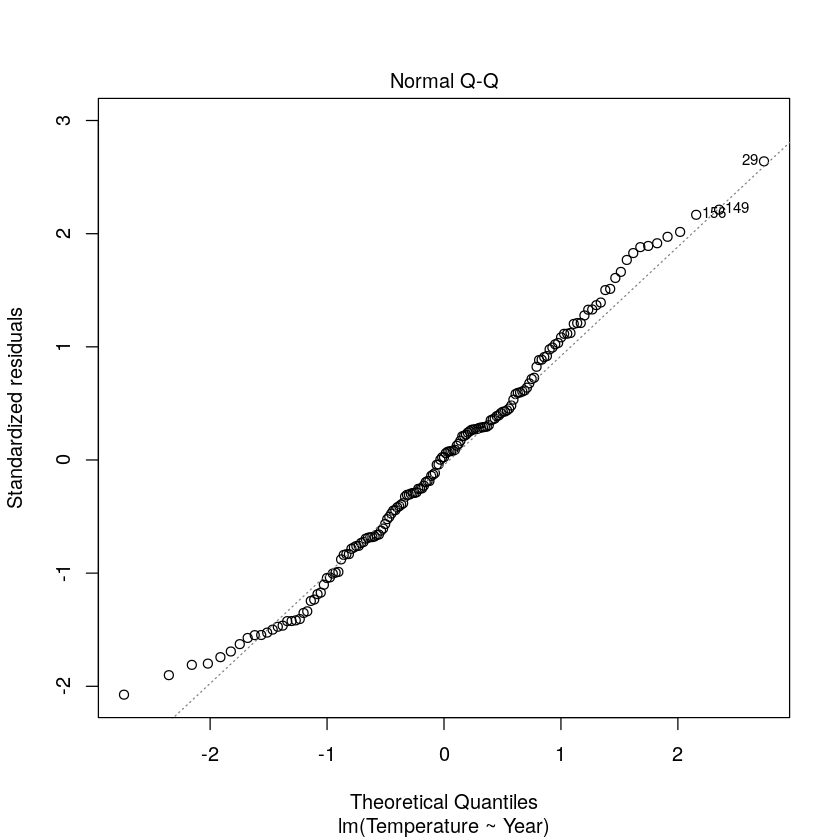

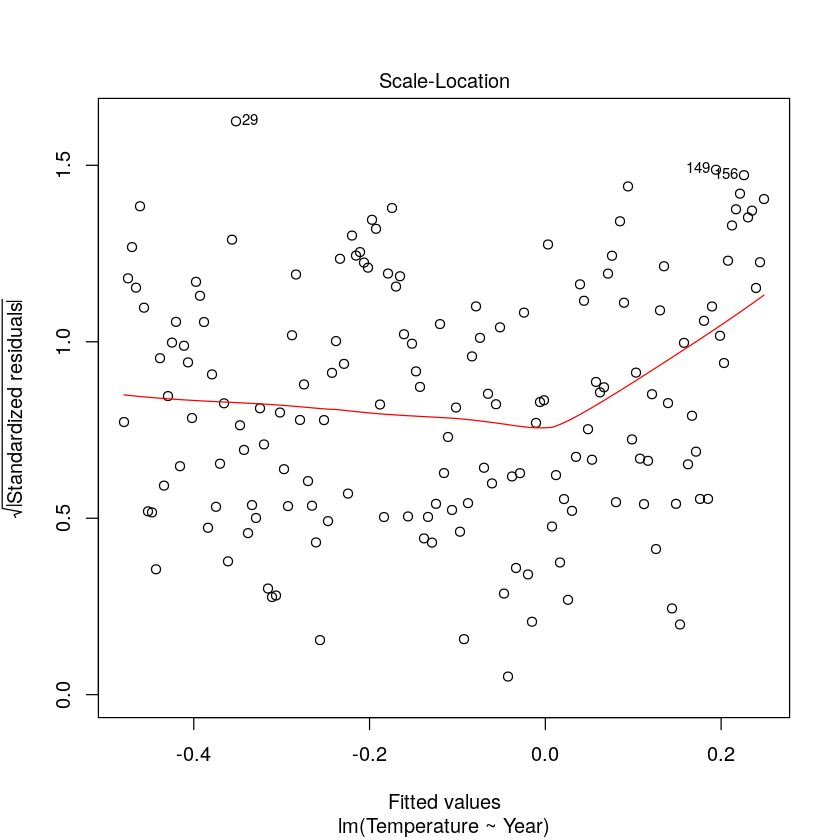

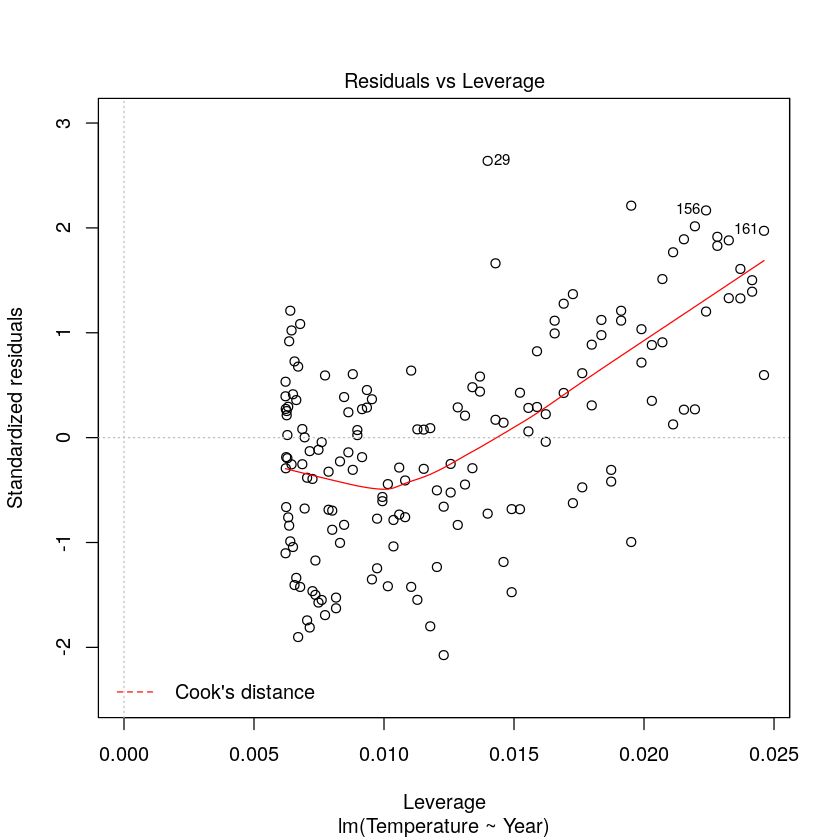

In [21]:
# juguemos con el modelo lineal
year = (Year-1900)/100 # lo escalo porque sino la estimacion std me da cualquiera
modelo = lm(Temperature~Year)
plot(modelo)


No Studentized residuals with Bonferonni p < 0.05
Largest |rstudent|:
   rstudent unadjusted p-value Bonferonni p
29 2.690643          0.0078986           NA

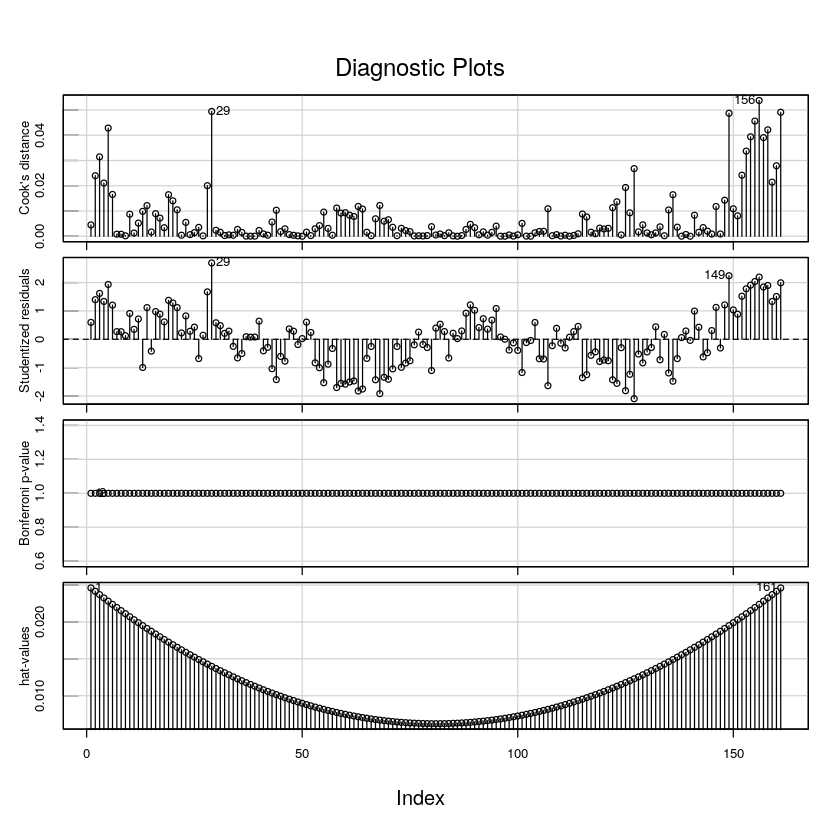

In [22]:
library(car)
influenceIndexPlot(modelo)
outlierTest(modelo)

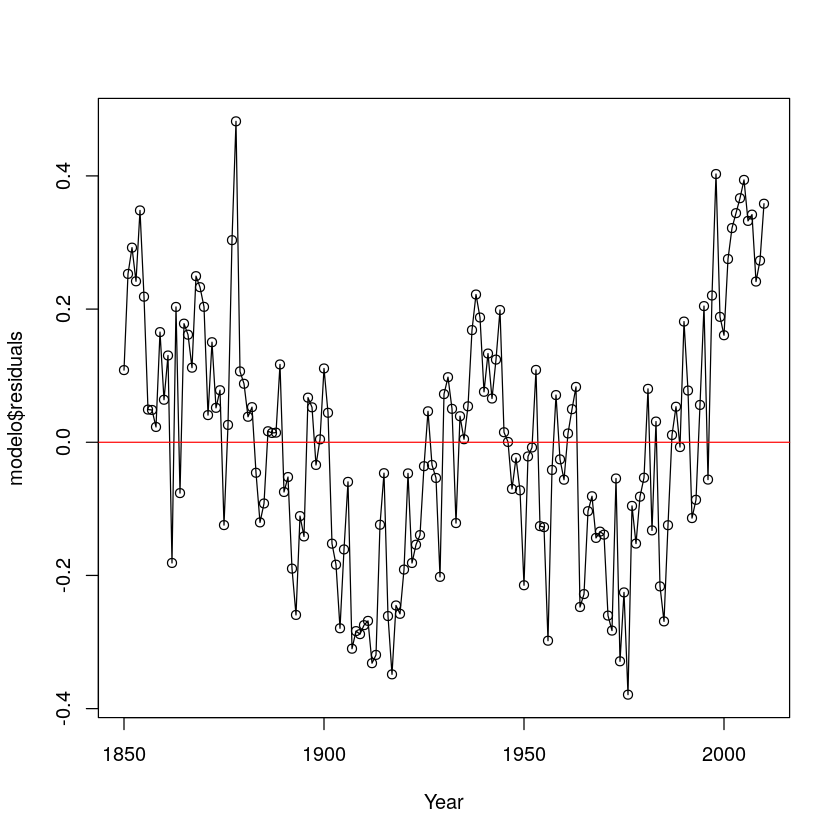

In [27]:
# miremos los residuos

plot(Year, modelo$residuals)
lines(Year, modelo$residuals)
abline(h=0, col="red")

In [28]:
# en el grafico vemos rachas de muchos valores positivos, luego de negativos: esa presencia de rachas me alerta de una correlacion entr eellos
# si tendria correlación negativa fuerte, entonces veria una alternancia

# veamoslo mas claro

idx1 = which(Year==1902)
idx2 = which(Year==1925)
sub.muestra = modelo$residuals[(modelo$residuals[idx1:idx2])]
n1 = length(sub.muestra)
mean(sub.muestra)
SE1 = sd(sub.muestra)/sqrt(n1)

[1] -0.000677345

In [ ]:
# 
acf()